<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap19/19_1_Markov_Decision_Processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 19.1: Markov Decision Processes**

This notebook investigates Markov decision processes as described in section 19.1 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
# Get local copies of components of images
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap19/Empty.png
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap19/Hole.png
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap19/Fish.png
!wget https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap19/Penguin.png

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
# Ugly class that takes care of drawing pictures like in the book.
# You can totally ignore this code!
class DrawMDP:
  # Constructor initializes parameters
  def __init__(self, n_row, n_col):
    self.empty_image = np.asarray(Image.open('Empty.png'))
    self.hole_image = np.asarray(Image.open('Hole.png'))
    self.fish_image = np.asarray(Image.open('Fish.png'))
    self.penguin_image = np.asarray(Image.open('Penguin.png'))
    self.fig,self.ax = plt.subplots()
    self.n_row = n_row
    self.n_col = n_col

    my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
    my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
    r = np.floor(my_colormap_vals_dec/(256*256))
    g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
    b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
    self.colormap = np.vstack((r,g,b)).transpose()/255.0


  def draw_text(self, text, row, col, position, color):
    if position == 'bc':
      self.ax.text( 83*col+41,83 * (row+1) -10, text, horizontalalignment="center", color=color, fontweight='bold')
    if position == 'tl':
      self.ax.text( 83*col+5,83 * row +5, text, verticalalignment = 'top', horizontalalignment="left", color=color, fontweight='bold')

  # Draws a set of states
  def draw_path(self, path, color1, color2):
    for i in range(len(path)-1):
      row_start = np.floor(path[i]/self.n_col)
      row_end = np.floor(path[i+1]/self.n_col)
      col_start = path[i] - row_start * self.n_col
      col_end = path[i+1] - row_end * self.n_col

      color_index = int(np.floor(255 * i/(len(path)-1.)))
      self.ax.plot([col_start * 83+41 + i, col_end * 83+41 + i ],[row_start * 83+41 +  i, row_end * 83+41 + i ], color=(self.colormap[color_index,0],self.colormap[color_index,1],self.colormap[color_index,2]))


  # Draw deterministic policy
  def draw_deterministic_policy(self,i, action):
      row = np.floor(i/self.n_col)
      col = i - row * self.n_col
      center_x = 83 * col + 41
      center_y = 83 * row + 41
      arrow_base_width = 10
      arrow_height = 15
      # Draw arrow pointing upward
      if action ==0:
          triangle_indices = np.array([[center_x, center_y-arrow_height/2],
                              [center_x - arrow_base_width/2, center_y+arrow_height/2],
                              [center_x + arrow_base_width/2, center_y+arrow_height/2]])
      # Draw arrow pointing right
      if action ==1:
          triangle_indices = np.array([[center_x + arrow_height/2, center_y],
                              [center_x - arrow_height/2, center_y-arrow_base_width/2],
                              [center_x - arrow_height/2, center_y+arrow_base_width/2]])
      # Draw arrow pointing downward
      if action ==2:
          triangle_indices = np.array([[center_x, center_y+arrow_height/2],
                              [center_x - arrow_base_width/2, center_y-arrow_height/2],
                              [center_x + arrow_base_width/2, center_y-arrow_height/2]])
      # Draw arrow pointing left
      if action ==3:
          triangle_indices = np.array([[center_x - arrow_height/2, center_y],
                              [center_x + arrow_height/2, center_y-arrow_base_width/2],
                              [center_x + arrow_height/2, center_y+arrow_base_width/2]])
      self.ax.fill(triangle_indices[:,0], triangle_indices[:,1],facecolor='cyan', edgecolor='darkcyan', linewidth=1)

  # Draw stochastic policy
  def draw_stochastic_policy(self,i, action_probs):
      row = np.floor(i/self.n_col)
      col = i - row * self.n_col
      offset = 20
      # Draw arrow pointing upward
      center_x = 83 * col + 41
      center_y = 83 * row + 41 - offset
      arrow_base_width = 15 * action_probs[0]
      arrow_height = 20 * action_probs[0]
      triangle_indices = np.array([[center_x, center_y-arrow_height/2],
                          [center_x - arrow_base_width/2, center_y+arrow_height/2],
                          [center_x + arrow_base_width/2, center_y+arrow_height/2]])
      self.ax.fill(triangle_indices[:,0], triangle_indices[:,1],facecolor='cyan', edgecolor='darkcyan', linewidth=1)

      # Draw arrow pointing right
      center_x = 83 * col + 41 + offset
      center_y = 83 * row + 41
      arrow_base_width = 15 * action_probs[1]
      arrow_height = 20 * action_probs[1]
      triangle_indices = np.array([[center_x + arrow_height/2, center_y],
                          [center_x - arrow_height/2, center_y-arrow_base_width/2],
                          [center_x - arrow_height/2, center_y+arrow_base_width/2]])
      self.ax.fill(triangle_indices[:,0], triangle_indices[:,1],facecolor='cyan', edgecolor='darkcyan', linewidth=1)

      # Draw arrow pointing downward
      center_x = 83 * col + 41
      center_y = 83 * row + 41 +offset
      arrow_base_width = 15 * action_probs[2]
      arrow_height = 20 * action_probs[2]
      triangle_indices = np.array([[center_x, center_y+arrow_height/2],
                          [center_x - arrow_base_width/2, center_y-arrow_height/2],
                          [center_x + arrow_base_width/2, center_y-arrow_height/2]])
      self.ax.fill(triangle_indices[:,0], triangle_indices[:,1],facecolor='cyan', edgecolor='darkcyan', linewidth=1)

      # Draw arrow pointing left
      center_x = 83 * col + 41 -offset
      center_y = 83 * row + 41
      arrow_base_width = 15 * action_probs[3]
      arrow_height = 20 * action_probs[3]
      triangle_indices = np.array([[center_x - arrow_height/2, center_y],
                          [center_x + arrow_height/2, center_y-arrow_base_width/2],
                          [center_x + arrow_height/2, center_y+arrow_base_width/2]])
      self.ax.fill(triangle_indices[:,0], triangle_indices[:,1],facecolor='cyan', edgecolor='darkcyan', linewidth=1)




  def draw(self, layout, state, draw_state_index= False, rewards=None, policy=None, state_values=None, action_values=None,path1=None, path2 = None):
    # Construct the image
    image_out = np.zeros((self.n_row * 83, self.n_col * 83, 4),dtype='uint8')
    for c_row in range (self.n_row):
      for c_col in range(self.n_col):
        if layout[c_row * self.n_col + c_col]==0:
          image_out[c_row*83:c_row*83+83, c_col*83:c_col*83+83,:] = self.empty_image
        elif layout[c_row * self.n_col + c_col]==1:
          image_out[c_row*83:c_row*83+83, c_col*83:c_col*83+83,:] = self.hole_image
        else:
          image_out[c_row*83:c_row*83+83, c_col*83:c_col*83+83,:] = self.fish_image
        if state == c_row * self.n_col + c_col:
          image_out[c_row*83:c_row*83+83, c_col*83:c_col*83+83,:] = self.penguin_image

    # Draw the image
    plt.imshow(image_out)
    self.ax.get_xaxis().set_visible(False)
    self.ax.get_yaxis().set_visible(False)
    self.ax.spines['top'].set_visible(False)
    self.ax.spines['right'].set_visible(False)
    self.ax.spines['bottom'].set_visible(False)
    self.ax.spines['left'].set_visible(False)

    if draw_state_index:
      for c_cell in range(layout.size):
          self.draw_text("%d"%(c_cell), np.floor(c_cell/self.n_col), c_cell-np.floor(c_cell/self.n_col)*self.n_col,'tl','k')

    # Draw the policy as triangles
    if policy is not None:
        # If the policy is deterministic
        if len(policy) == len(layout):
          for i in range(len(layout)):
            self.draw_deterministic_policy(i, policy[i])
        # Else it is stochastic
        else:
          for i in range(len(layout)):
            self.draw_stochastic_policy(i,policy[:,i])


    if path1 is not None:
      # self.draw_path(path1, np.array([0.81, 0.51, 0.38]), np.array([1.0, 0.2, 0.5]))
      self.draw_path(path1, np.array([1.0, 0.0, 0.0]), np.array([0.0, 1.0, 1.0]))


    plt.show()

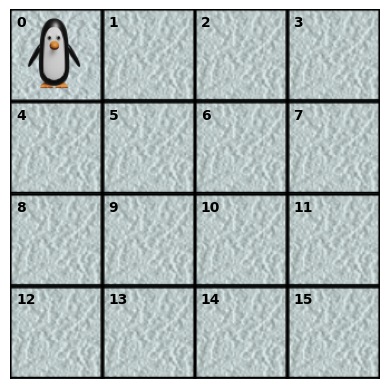

In [7]:
# Let's draw the initial situation with the penguin in top right
n_rows = 4; n_cols = 4
layout = np.zeros(n_rows * n_cols)
initial_state = 0
mdp_drawer = DrawMDP(n_rows, n_cols)
mdp_drawer.draw(layout, state = initial_state, draw_state_index = True)

Note that the states are indexed from 0 rather than 1 as in the book to make
the code neater.

In [15]:
# Define the state probabilities
transition_probabilities = np.array( \
[[0.00 , 0.33, 0.00, 0.00,  0.33, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.50 , 0.00, 0.33, 0.00,  0.00, 0.25, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.33, 0.00, 0.50,  0.00, 0.00, 0.25, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.33, 0.00,  0.00, 0.00, 0.00, 0.33,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.50 , 0.00, 0.00, 0.00,  0.00, 0.25, 0.00, 0.00,   0.33, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.34, 0.00, 0.00,  0.33, 0.00, 0.25, 0.00,   0.00, 0.25, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.34, 0.00,  0.00, 0.25, 0.00, 0.33,   0.00, 0.00, 0.25, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.50,  0.00, 0.00, 0.25, 0.00,   0.00, 0.00, 0.00, 0.33,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.34, 0.00, 0.00, 0.00,   0.00, 0.25, 0.00, 0.00,   0.50, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.25, 0.00, 0.00,   0.33, 0.00, 0.25, 0.00,   0.00, 0.33, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.25, 0.00,   0.00, 0.25, 0.00, 0.33,   0.00, 0.00, 0.33, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.34,   0.00, 0.00, 0.25, 0.00,   0.00, 0.00, 0.00, 0.50 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.34, 0.00, 0.00, 0.00,   0.00, 0.33, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.25, 0.00, 0.00,   0.50, 0.00, 0.33, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.25, 0.00,   0.00, 0.34, 0.00, 0.50 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.34,   0.00, 0.00, 0.34, 0.00 ],
])
initial_state = 0

Define a step from the Markov process

In [36]:
def markov_process_step(state, transition_probabilities):
  # TODO -- update the state according to the appropriate transition probabilities
  # One way to do this is to use np.random.choice
  # Replace this line:
  num_states = transition_probabilities.shape[0]
  new_state = np.random.choice(num_states, p=transition_probabilities[:, state])

  return new_state

Run the Markov process for 10 steps and visualise the results

Your States: [ 0  4  8  9 10  9 10  9 13 14]
True States: [ 0  4  8  9 10  9 10  9 13 14]


C:\Users\minguhn\AppData\Local\Temp\ipykernel_40804\1351184702.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  states[t+1] = markov_process_step(states[t], transition_probabilities)


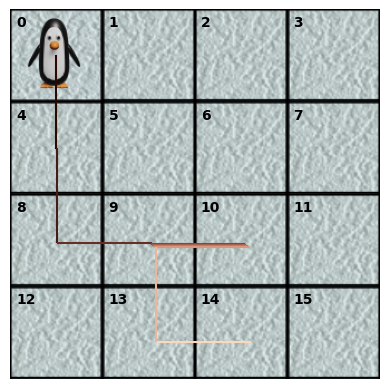

In [55]:
np.random.seed(0)
T = 10
states = np.zeros(T, dtype='uint8')
states[0] = 0
for t in range(T-1):
  states[t+1] = markov_process_step(states[t], transition_probabilities)



print("Your States:", states)
print("True States: [ 0  4  8  9 10  9 10  9 13 14]")
mdp_drawer = DrawMDP(n_rows, n_cols)
mdp_drawer.draw(layout, state = states[0], path1=states, draw_state_index = True)

Define a Markov one step of a reward process.

In [62]:
def markov_reward_process_step(state, transition_probabilities, reward_structure):

    # TODO -- write this function
    # Update the state.  Return a reward of +1 if the Penguin lands on the fish
    # or zero otherwise.
    # Replace this line
    new_state = 0; reward = 0; num_states = transition_probabilities.shape[0]
    new_state = np.random.choice(num_states, p=transition_probabilities[:, state])
    reward = 1 if reward_structure[new_state]==1 else 0

    return new_state, reward

Run the Markov reward process for 10 steps and visualise the results

Your States: [ 0  4  8  9 10  9 10  9 13 14]
Your Rewards: [0 0 1 0 1 0 1 0 0 0]
True Rewards: [0 0 1 0 1 0 1 0 0 0]


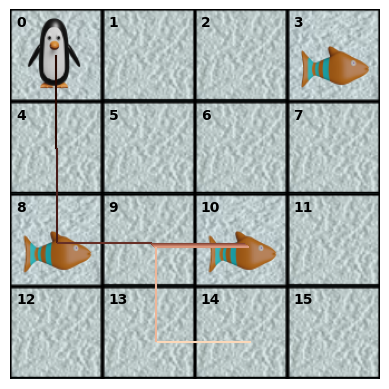

In [64]:
# Set up the reward structure so it matches figure 19.2
reward_structure = np.zeros((16,1))
reward_structure[3] = 1; reward_structure[8] = 1; reward_structure[10] = 1

# Initialize random numbers
np.random.seed(0)
T = 10
# Set up the states, so the fish are in the same positions as figure 19.2
states = np.zeros(T, dtype='uint8')
rewards = np.zeros(T, dtype='uint8')

states[0] = 0
for t in range(T-1):
  states[t+1],rewards[t+1] = markov_reward_process_step(states[t], transition_probabilities, reward_structure)

print("Your States:", states)
print("Your Rewards:", rewards)
print("True Rewards: [0 0 1 0 1 0 1 0 0 0]")


# Draw the figure
layout = np.zeros(n_rows * n_cols)
layout[3] = 2; layout[8] = 2 ; layout[10] = 2
mdp_drawer = DrawMDP(n_rows, n_cols)
mdp_drawer.draw(layout, state = states[0], path1=states, draw_state_index = True)

Now let's calculate the return -- the sum of discounted future rewards

In [72]:
def calculate_return(rewards, gamma):
  # TODO -- you write this function
  # It should compute one return for the start of the sequence (i.e. G_1)
  # Replace this line
  return_val = 0.0
  for i, r in enumerate(rewards):
    return_val += gamma ** i * r
  return return_val

In [73]:
gamma = 0.9
for t in range(len(states)):
  print("Return at time %d = %3.3f"%(t, calculate_return(rewards[t:],gamma)))

# Reality check!
print("True return at time 0: 1.998")

Return at time 0 = 1.998
Return at time 1 = 2.219
Return at time 2 = 2.466
Return at time 3 = 1.629
Return at time 4 = 1.810
Return at time 5 = 0.900
Return at time 6 = 1.000
Return at time 7 = 0.000
Return at time 8 = 0.000
Return at time 9 = 0.000
True return at time 0: 1.998


Now let's define the state transition function $Pr(s_{t+1}|s_{t},a)$ in full where $a$ is the actions.  Here $a=0$ means try to go upward, $a=1$, right, $a=2$ down and $a=3$ right.  However, the ice is slippery, so we don't always go the direction we want to.

Note that as for the states, we've indexed the actions from zero (unlike in the book, so they map to the indices of arrays better)

In [79]:
transition_probabilities_given_action1 = np.array(\
[[0.00 , 0.33, 0.00, 0.00,  0.50, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.50 , 0.00, 0.33, 0.00,  0.00, 0.50, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.33, 0.00, 0.50,  0.00, 0.00, 0.50, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.33, 0.00,  0.00, 0.00, 0.00, 0.50,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.50 , 0.00, 0.00, 0.00,  0.00, 0.17, 0.00, 0.00,   0.50, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.34, 0.00, 0.00,  0.25, 0.00, 0.17, 0.00,   0.00, 0.50, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.34, 0.00,  0.00, 0.17, 0.00, 0.25,   0.00, 0.00, 0.50, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.50,  0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.50,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.25, 0.00, 0.00, 0.00,   0.00, 0.17, 0.00, 0.00,   0.75, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.16, 0.00, 0.00,   0.25, 0.00, 0.17, 0.00,   0.00, 0.50, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.16, 0.00,   0.00, 0.17, 0.00, 0.25,   0.00, 0.00, 0.50, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.75 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.25, 0.00, 0.00, 0.00,   0.00, 0.25, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.16, 0.00, 0.00,   0.25, 0.00, 0.25, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.16, 0.00,   0.00, 0.25, 0.00, 0.25 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.25, 0.00 ],
])

transition_probabilities_given_action2 = np.array(\
[[0.00 , 0.25, 0.00, 0.00,  0.25, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.75 , 0.00, 0.25, 0.00,  0.00, 0.17, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.50, 0.00, 0.50,  0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.50, 0.00,  0.00, 0.00, 0.00, 0.33,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.25 , 0.00, 0.00, 0.00,  0.00, 0.17, 0.00, 0.00,   0.25, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.25, 0.00, 0.00,  0.50, 0.00, 0.17, 0.00,   0.00, 0.17, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.25, 0.00,  0.00, 0.50, 0.00, 0.33,   0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.50,  0.00, 0.00, 0.50, 0.00,   0.00, 0.00, 0.00, 0.33,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.25, 0.00, 0.00, 0.00,   0.00, 0.17, 0.00, 0.00,   0.25, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.16, 0.00, 0.00,   0.50, 0.00, 0.17, 0.00,   0.00, 0.25, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.16, 0.00,   0.00, 0.50, 0.00, 0.33,   0.00, 0.00, 0.25, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.34,   0.00, 0.00, 0.50, 0.00,   0.00, 0.00, 0.00, 0.50 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.25, 0.00, 0.00, 0.00,   0.00, 0.25, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.16, 0.00, 0.00,   0.75, 0.00, 0.25, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.16, 0.00,   0.00, 0.50, 0.00, 0.50 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.34,   0.00, 0.00, 0.50, 0.00 ],
])

transition_probabilities_given_action3 = np.array(\
[[0.00 , 0.25, 0.00, 0.00,  0.25, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.25 , 0.00, 0.25, 0.00,  0.00, 0.17, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.25, 0.00, 0.25,  0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.25, 0.00,  0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.75 , 0.00, 0.00, 0.00,  0.00, 0.17, 0.00, 0.00,   0.25, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.50, 0.00, 0.00,  0.25, 0.00, 0.17, 0.00,   0.00, 0.17, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.50, 0.00,  0.00, 0.16, 0.00, 0.25,   0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.75,  0.00, 0.00, 0.16, 0.00,   0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.50, 0.00, 0.00, 0.00,   0.00, 0.17, 0.00, 0.00,   0.50, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.50, 0.00, 0.00,   0.25, 0.00, 0.17, 0.00,   0.00, 0.33, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.50, 0.00,   0.00, 0.16, 0.00, 0.25,   0.00, 0.00, 0.33, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.50,   0.00, 0.00, 0.16, 0.00,   0.00, 0.00, 0.00, 0.50 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.50, 0.00, 0.00, 0.00,   0.00, 0.33, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.50, 0.00, 0.00,   0.50, 0.00, 0.33, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.50, 0.00,   0.00, 0.34, 0.00, 0.50 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.50,   0.00, 0.00, 0.34, 0.00 ],
])

transition_probabilities_given_action4 = np.array(\
[[0.00 , 0.25, 0.00, 0.00,  0.33, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.50 , 0.00, 0.25, 0.00,  0.00, 0.17, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.50, 0.00, 0.75,  0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.50, 0.00,  0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.50 , 0.00, 0.00, 0.00,  0.00, 0.50, 0.00, 0.00,   0.33, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.25, 0.00, 0.00,  0.33, 0.00, 0.50, 0.00,   0.00, 0.17, 0.00, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.25, 0.00,  0.00, 0.17, 0.00, 0.50,   0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.25,  0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.34, 0.00, 0.00, 0.00,   0.00, 0.50, 0.00, 0.00,   0.50, 0.00, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.16, 0.00, 0.00,   0.33, 0.00, 0.50, 0.00,   0.00, 0.25, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.16, 0.00,   0.00, 0.17, 0.00, 0.50,   0.00, 0.00, 0.25, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.17, 0.00,   0.00, 0.00, 0.00, 0.25 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.34, 0.00, 0.00, 0.00,   0.00, 0.50, 0.00, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.16, 0.00, 0.00,   0.50, 0.00, 0.50, 0.00 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.16, 0.00,   0.00, 0.25, 0.00, 0.75 ],
 [0.00 , 0.00, 0.00, 0.00,  0.00, 0.00, 0.00, 0.00,   0.00, 0.00, 0.00, 0.25,   0.00, 0.00, 0.25, 0.00 ],
])

# Store all of these in a three dimension array
# Pr(s_{t+1}=2|s_{t}=1, a_{t}=3] is stored at position [2,1,3]
transition_probabilities_given_action = np.concatenate((np.expand_dims(transition_probabilities_given_action1,2),
                                                        np.expand_dims(transition_probabilities_given_action2,2),
                                                        np.expand_dims(transition_probabilities_given_action3,2),
                                                        np.expand_dims(transition_probabilities_given_action4,2)),axis=2)

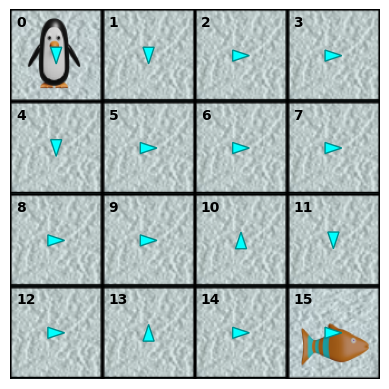

In [80]:
# Now we need a policy.  Let's start with the deterministic policy in figure 19.5a:
policy = [2,2,1,1, 2,1,1,1, 1,1,0,2, 1,0,1,1]

# Let's draw the policy first
layout = np.zeros(n_rows * n_cols)
layout[15] = 2
mdp_drawer = DrawMDP(n_rows, n_cols)
mdp_drawer.draw(layout, state = states[0], policy = policy, draw_state_index = True)

In [84]:
def markov_decision_process_step_deterministic(state, transition_probabilities_given_action, reward_structure, policy):
  # TODO -- complete this function.
  # For each state, there's is a corresponding action.
  # Draw the next state based on the current state and that action
  # and calculate the reward
  # Replace this line:
  new_state = 0; reward = 0;
  new_state = np.random.choice(16, size=1, p=transition_probabilities_given_action[:, state, policy[state]])

  reward = reward_structure[new_state]
  

  return new_state, reward


Your States: [ 0  4  8  9 10 14 15 11  7  3]
True States: [ 0  4  8  9 13 14 15 11  7  3]
Your Rewards: [0 0 0 0 0 0 1 0 0 0]
True Rewards: [0 0 0 0 0 0 1 0 0 0]


C:\Users\minguhn\AppData\Local\Temp\ipykernel_40804\2955369453.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  states[t+1],rewards[t+1] = markov_decision_process_step_deterministic(states[t], transition_probabilities_given_action, reward_structure, policy)


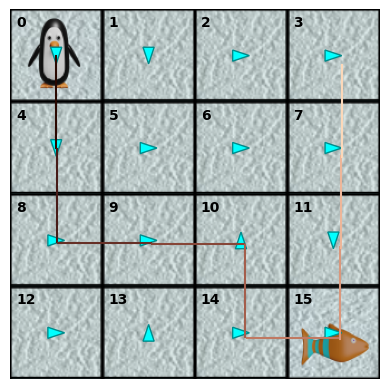

In [85]:
# Set up the reward structure so it matches figure 19.2
reward_structure = np.zeros((16,1))
reward_structure[15] = 1

# Initialize random number seed
np.random.seed(3)
T = 10
# Set up the states, so the fish are in the same positions as figure 19.5
states = np.zeros(T, dtype='uint8')
rewards = np.zeros(T, dtype='uint8')

states[0] = 0
for t in range(T-1):
  states[t+1],rewards[t+1] = markov_decision_process_step_deterministic(states[t], transition_probabilities_given_action, reward_structure, policy)

print("Your States:", states)
print("True States: [ 0  4  8  9 13 14 15 11  7  3]")
print("Your Rewards:", rewards)
print("True Rewards: [0 0 0 0 0 0 1 0 0 0]")

mdp_drawer = DrawMDP(n_rows, n_cols)
mdp_drawer.draw(layout, state = states[0], path1=states, policy = policy, draw_state_index = True)

You can see that the Penguin usually follows the policy, (heads in the direction of the cyan arrows (when it can).  But sometimes, the penguin "slips" to a different neighboring state

Now let's investigate a stochastic policy

[[0.54 0.46 0.52 0.75 0.61 0.06 0.39 0.24 0.08 0.45 0.4  0.33 0.27 0.17
  0.45 0.27]
 [0.41 0.25 0.27 0.03 0.01 0.32 0.36 0.13 0.81 0.07 0.36 0.06 0.59 0.64
  0.34 0.28]
 [0.04 0.04 0.14 0.09 0.32 0.56 0.1  0.2  0.03 0.07 0.06 0.55 0.08 0.09
  0.08 0.42]
 [0.02 0.25 0.08 0.12 0.06 0.05 0.15 0.43 0.09 0.41 0.18 0.05 0.06 0.1
  0.13 0.03]]


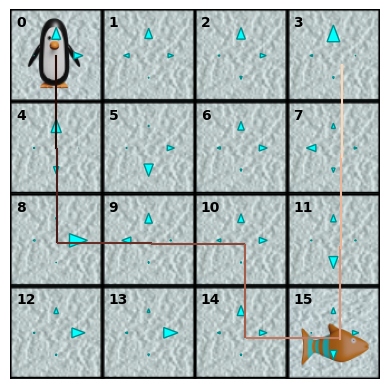

In [108]:
np.random.seed(0)
# Let's now choose a random policy.  We'll generate a set of random numbers and pass
# them through a softmax function
stochastic_policy = np.random.normal(size=(4,n_rows*n_cols))
stochastic_policy = np.exp(stochastic_policy) / (np.ones((4,1))@ np.expand_dims(np.sum(np.exp(stochastic_policy), axis=0),0))
np.set_printoptions(precision=2)
print(stochastic_policy)

# Let's draw the policy first
layout = np.zeros(n_rows * n_cols)
layout[15] = 2
mdp_drawer = DrawMDP(n_rows, n_cols)
mdp_drawer.draw(layout, state = states[0], path1=states, policy = stochastic_policy, draw_state_index = True)

In [135]:
def markov_decision_process_step_stochastic(state, transition_probabilities_given_action, reward_structure, stochastic_policy):
  # TODO -- complete this function.
  # For each state, there's is a corresponding distribution over actions
  # Draw a sample from that distribution to get the action
  # Draw the next state based on the current state and that action
  # and calculate the reward
  # Replace this line:
  new_state = 0; reward = 0; action = 0
  action = np.random.choice(4, p=stochastic_policy[:, state])
  new_state = np.random.choice(16, p=transition_probabilities_given_action[:, state, action])
  reward = reward_structure[new_state]

  return new_state, reward, action

Actions [1 1 0 0 3 2 1 0 0]
Your States: [ 0  1  2  3  7  6 10 14 10 11]
Your Rewards: [0 0 0 0 0 0 0 0 0 0]


C:\Users\minguhn\AppData\Local\Temp\ipykernel_40804\608646435.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  states[t+1],rewards[t+1],actions[t] = markov_decision_process_step_stochastic(states[t], transition_probabilities_given_action, reward_structure, stochastic_policy)


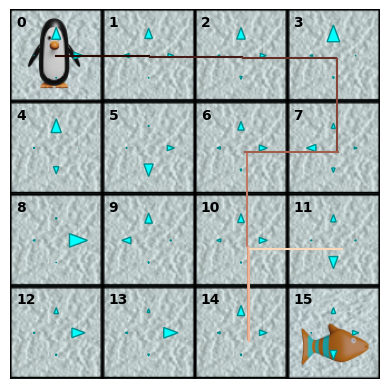

In [136]:
# Set up the reward structure so it matches figure 19.2
reward_structure = np.zeros((16,1))
reward_structure[15] = 1

# Initialize random number seed
np.random.seed(0)
T = 10
# Set up the states, so the fish are in the same positions as figure 19.5
states = np.zeros(T, dtype='uint8')
rewards = np.zeros(T, dtype='uint8')
actions = np.zeros(T-1, dtype='uint8')

states[0] = 0
for t in range(T-1):
  states[t+1],rewards[t+1],actions[t] = markov_decision_process_step_stochastic(states[t], transition_probabilities_given_action, reward_structure, stochastic_policy)

print("Actions", actions)
print("Your States:", states)
print("Your Rewards:", rewards)

mdp_drawer = DrawMDP(n_rows, n_cols)
mdp_drawer.draw(layout, state = states[0], path1=states, policy = stochastic_policy, draw_state_index = True)